# Project 1
Grant Johnson
<br>
MSE 5820X

In [2]:
# Import necessary packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.lines as mlines

## 1 Data Analysis of Gleeble Hardness/Microstructure Data
The Gleeble is a piece of equipment that uses Joule heating to locally heat a sample to introduce changes in the microstructure due to annealing temperature, cooling rate, etc.

### 1.1 Hardness Profile with Error Bars
The first graphic uses a profile along the gauge length of the specimen using a number of points. Each row corresponds to hardness tests that are 1 mm away from each other along the gauge length.The cell below defines functions for the statistics of this. The error bars in the graphic are the 95% confidence interval.

In [283]:
# Create a function that passes back the z-value from the Student's T Distribution for the 95% confidence interval
def Zvalue(n):
    z = 0
    if n==20:
        z = 2.093
    elif n == 19:
        z = 2.101
    elif n == 18:
        z = 2.110
    elif n == 17:
        z = 2.120
    elif n == 16:
        z = 2.131
    elif n == 15:
        z = 2.145
    elif n == 14:
        z = 2.160
    elif n == 13:
        z = 2.179
    elif n == 12:
        z = 2.201
    elif n == 11:
        z = 2.228
    elif n == 10:
        z = 2.262
    return z

# Create a function that performs the necessary statistical functions, namely mean, standard deviation, and 95% confidence interval
def Stats(list):
    n = len(list)
    ave = np.average(list)
    std = np.std(list, ddof=1)
    z = Zvalue(n)
    conf = std * z / np.sqrt(n)
    return ave, conf
    

In [284]:
# Import data for Hardness profile
df21 = pd.read_csv('Gleeble_2101T1_Hardness.csv')
df21

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,202,229,229,218,224,224,210,211,214,212,233.0,207,221
1,206,228,225,213,231,223,223,220,196,200,205.0,216,214
2,230,230,214,232,223,224,233,230,226,190,202.0,202,205
3,215,241,221,210,214,226,230,216,219,221,206.0,204,198
4,217,221,234,233,227,240,217,230,213,217,201.0,199,201
5,233,221,221,221,226,233,220,228,209,209,209.0,199,213
6,240,224,220,229,220,215,231,232,214,210,210.0,201,195
7,228,241,228,220,231,229,215,203,208,209,198.0,207,190
8,232,224,223,232,227,220,225,225,219,221,208.0,206,198
9,221,234,229,226,227,223,232,227,197,207,227.0,207,203


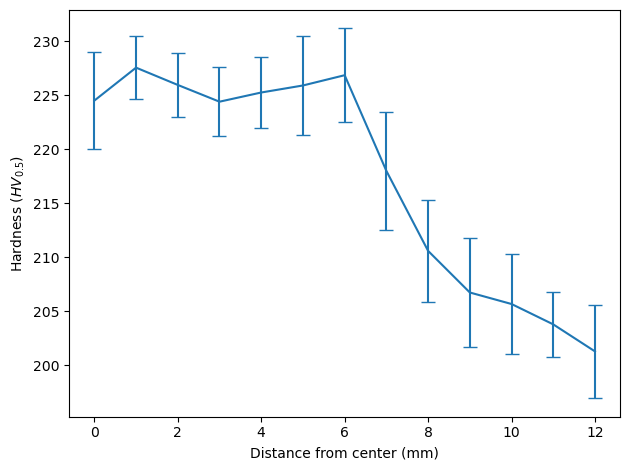

In [285]:
# Initialize lists
sets = []
list_ave = []
list_conf = []

# For each column, get rid of NaN values and use the Stats 
# function previously defined to get the average and 
# 95% confidence interval and add them both to lists

for col in df21.columns:
    set_n = pd.to_numeric(df21[col]).dropna().values
    sets.append(set_n)

    ave, conf = Stats(set_n)
    list_ave.append(ave)
    list_conf.append(conf)

# Plot line plot with error bars added using 95% confidence interval
plt.errorbar(range(len(list_ave)), list_ave, yerr=list_conf, capsize=5)
plt.xlabel('Distance from center (mm)')
plt.ylabel('Hardness ($HV_{0.5}$)')
plt.tight_layout()

### 1.2 Pearson Correlation Matrix
Analysis of correlation between properties and microstructure. 
This is used to understand which microstructural features correlate to other microstructural features as well as the hardness.

In [24]:
# Create a Pandas Dataframe with the data
df_original = pd.read_csv('Gleeble_Data.csv')
perimeter = df_original.pop('Perimeter Fraction - Ferrite')
df_original.insert(9, 'Perimeter Fraction - Ferrite', perimeter)
df = df_original.drop(columns=['Sample','Distance from center','Area Fraction - Austenite','Perimeter Fraction - Austenite']) # Remove the columns that can't be used for correlation coefficient measurement
df.rename(columns={'Perimeter Fraction - Ferrite':'Phase Boundary Area Density'}, inplace=True)
df = df[['Hardness', 'Area Fraction - Ferrite', 'Mean Intercept - Ferrite', 'Mean Inverse Intercept - Ferrite', 'Mean Nearest Neighbor - Ferrite', 'Mean Average Neighbor - Ferrite', 'Mean Equivalent Diameter - Ferrite', 'Mean Roundness - Ferrite', 'Mean Intercept - Austenite', 'Mean Inverse Intercept - Austenite', 'Mean Nearest Neighbor - Austenite', 'Mean Average Neighbor - Austenite', 'Mean Equivalent Diameter - Austenite', 'Mean Roundness - Austenite', 'Phase Boundary Area Density']]
# column_headers = list(df.columns.values)
# print(column_headers)

df

,Hardness,Area Fraction - Ferrite,Mean Intercept - Ferrite,Mean Inverse Intercept - Ferrite,Mean Nearest Neighbor - Ferrite,Mean Average Neighbor - Ferrite,Mean Equivalent Diameter - Ferrite,Mean Roundness - Ferrite,Mean Intercept - Austenite,Mean Inverse Intercept - Austenite,Mean Nearest Neighbor - Austenite,Mean Average Neighbor - Austenite,Mean Equivalent Diameter - Austenite,Mean Roundness - Austenite,Phase Boundary Area Density
0,224.500,58.310,0.01960,153.2538,0.00790,0.02884,0.00308,0.67292,0.01269,139.7774,0.01634,0.03784,0.01446,0.61706,105.84209
1,227.550,59.872,0.01944,154.4899,0.00893,0.03280,0.00297,0.66591,0.01220,143.4454,0.01598,0.03686,0.01361,0.61043,108.05757
2,225.950,60.905,0.01925,153.8796,0.00981,0.03172,0.00298,0.66170,0.01161,150.1647,0.01413,0.03297,0.01182,0.61591,109.67937
3,224.400,60.146,0.01970,156.9621,0.00821,0.02914,0.00287,0.66158,0.01206,144.5700,0.01576,0.03650,0.01367,0.61524,104.56396
4,225.250,61.108,0.02110,147.8884,0.01037,0.03446,0.00362,0.65383,0.01240,142.9964,0.01605,0.03707,0.01381,0.60052,103.00866
5,225.900,60.462,0.02136,144.4656,0.00899,0.03242,0.00335,0.66888,0.01294,137.6376,0.01721,0.03859,0.01457,0.60926,97.59301
6,226.850,61.668,0.02213,149.5963,0.00846,0.03020,0.00343,0.66595,0.01243,144.3766,0.01634,0.03717,0.01304,0.62318,98.57366
7,218.000,60.948,0.02317,151.2930,0.01007,0.03363,0.00443,0.65565,0.01350,142.0857,0.01677,0.04102,0.01292,0.62418,90.52619
8,210.600,62.174,0.02820,145.4572,0.00984,0.03307,0.00417,0.65286,0.01574,140.1642,0.01627,0.04082,0.01154,0.61795,78.02542
9,206.750,59.706,0.02861,145.0801,0.00995,0.03162,0.00347,0.65415,0.01774,141.6000,0.01471,0.03945,0.01047,0.61741,72.71754


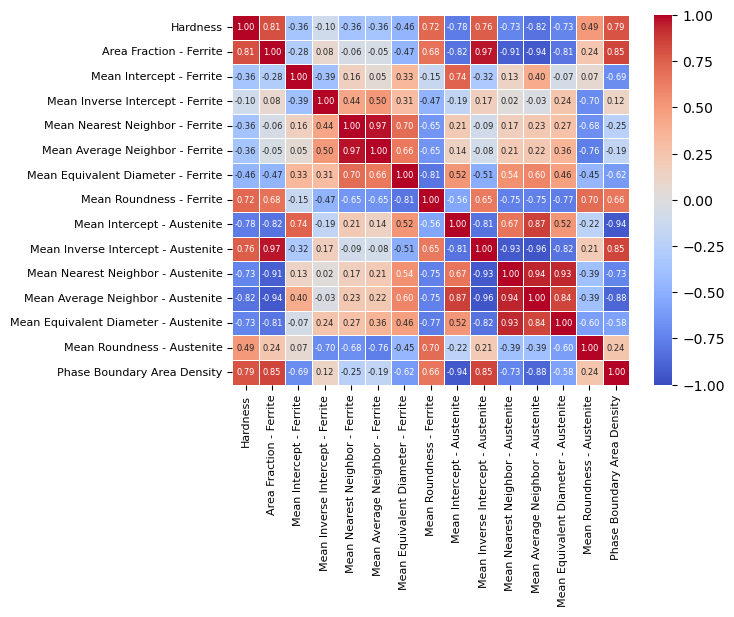

In [25]:
# Creating a correlation coefficient matrix
pearson_corr = df.corr(method='pearson')

# Calculating correlation and p-values for variables of interest
#r_value, p_value = pearsonr(df['Hardness'],df['Perimeter Fraction - Austenite'])
#r_value1, p_value1 = pearsonr(df['Hardness'],df['Area Fraction - Ferrite'])

# Plot the heatmap using the seaborn package
ax = sns.heatmap(
    pearson_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"size":6},
    vmin=-1,
    vmax=1
    )
#plt.title('Pearson Correlation Matrix Heatmap')
plt.xticks(fontsize=8)
ax.set_yticks(np.arange(len(pearson_corr)) + 0.5)
#ax.set_yticks(range(len(pearson_corr))+0.5)
ax.set_yticklabels(pearson_corr.index, rotation=0, fontsize=8)

plt.savefig('Pearson_corr_matrix_Gleeble.tif',dpi=450,bbox_inches='tight', pad_inches=0.1)

plt.show()

### 1.3 Subplots of Microstructure/Property Relationships
Using the Pearson correlation matrix, we can plot a few of the relationships that we have seen. Specifically, the phase fraction, the phase sizes, and the phase boundary perimeter fraction.

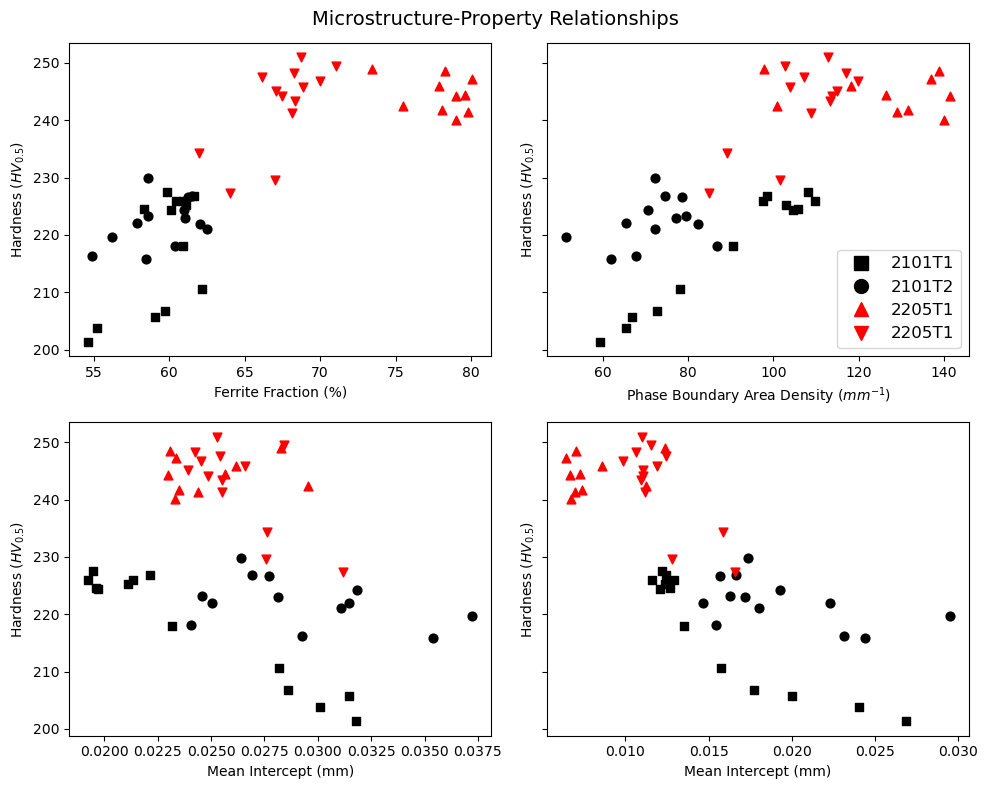

In [288]:
df0 = df_original

# Create a dictionary for what the color and shape of each scatter plot point 
marker_map = {
    '2101T1': 's',
    '2101T2': 'o',
    '2205T1': '^',
    '2205T2': 'v'
}
color_map = {
    '2101T1': 'k',
    '2101T2': 'k',
    '2205T1': 'r',
    '2205T2': 'r'
}

# Create a 2x2 plot matrix
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharey=True, figsize=(10,8))
#fig.text(0.05,0.5,r'Hardness ($HV_{0.5}$)', va='center', rotation=90, fontsize=12)
fig.suptitle('Microstructure-Property Relationships',fontsize=14)
for _, row in df0.iterrows():
    # Use the previous dictionary to assign a color and a shape based on the sample column
    ax0.scatter(row['Area Fraction - Ferrite'], row['Hardness'], 
                marker=marker_map[row['Sample']], 
                color=color_map[row['Sample']], s=40)
    ax1.scatter(row['Perimeter Fraction - Ferrite'], row['Hardness'], 
                marker=marker_map[row['Sample']], 
                color=color_map[row['Sample']], s=40) 
    ax2.scatter(row['Mean Intercept - Ferrite'], row['Hardness'], 
                marker=marker_map[row['Sample']], 
                color=color_map[row['Sample']], s=40)
    ax3.scatter(row['Mean Intercept - Austenite'], row['Hardness'],
                marker=marker_map[row['Sample']],
                color=color_map[row['Sample']], s=40)

#ax0.set_title('Hardness vs. Ferrite Fraction', fontsize=11)
ax0.set_xlabel('Ferrite Fraction (%)')
ax0.set_ylabel(r'Hardness ($HV_{0.5}$)')
#ax1.set_title('Hardness vs. Phase Boundary Fraction', fontsize=11)
ax1.set_xlabel('Phase Boundary Area Density ($mm^{-1}$)')
ax1.set_ylabel(r'Hardness ($HV_{0.5}$)')
#ax2.set_title('Hardness vs. Ferrite Mean Intercept', fontsize=11)
ax2.set_xlabel('Mean Intercept (mm)')
ax2.set_ylabel(r'Hardness ($HV_{0.5}$)')
#ax3.set_title('Hardness vs. Austenite Mean Intercept', fontsize=11)
ax3.set_xlabel('Mean Intercept (mm)')
ax3.set_ylabel(r'Hardness ($HV_{0.5}$)')

# Create a legend
black_square = mlines.Line2D([],[],color='k',marker='s',linestyle='None',markersize=10,label='2101T1')
black_circle = mlines.Line2D([],[],color='k',marker='o',linestyle='None',markersize=10,label='2101T2')
red_up = mlines.Line2D([],[], color='r',marker='^',linestyle='None',markersize=10,label='2205T1')
red_down = mlines.Line2D([],[], color='r',marker='v',linestyle='None',markersize=10,label='2205T1')
ax1.legend(handles=[black_square, black_circle, red_up, red_down], loc='lower right',fontsize=12)

plt.tight_layout()
plt.show()

## 2 Data Analysis of Porosity in L-DED Sample
A separate dataset, this data includes information about defects within a laser directed energy deposition build of 2205 duplex stainless steel. The information includes the location, the size, and the shape of the defects.

In [289]:
df1 = pd.read_csv('Pre-S1_Porosity.csv')
df1 = df1.drop(['Unnamed: 10','Unnamed: 11','avg','st dev'], axis=1)
df1

,Feature,Area (um^2),Roundness,CentroidX (um),CentroidY (um),First Moment of Area (um^3),Eccentricity,Equivalent Diameter (um),Nearest Neighbor Distance (um),Average Neighbor Distance (um)
0,1938,20.228864,1.073835,7532.205622,1271.324358,34.211366,0.104211,5.075056,96.337506,240.048939
1,2343,21.914603,1.068422,8990.169230,2247.136570,38.458722,0.000000,5.282285,107.661792,220.165750
2,3017,21.914603,1.068422,11214.259910,4423.187930,38.458722,0.000000,5.282285,147.851573,298.032672
3,3605,21.914603,1.068422,13646.737370,3895.404590,38.458722,0.000000,5.282285,92.825953,155.324208
4,1872,21.493168,1.058099,7307.539222,1188.304896,37.405651,0.260868,5.231248,93.983282,292.442586
...,...,...,...,...,...,...,...,...,...,...
3892,87,1517.164821,0.156178,1164.103625,7122.672042,97337.013720,0.993401,43.951271,95.234881,150.218060
3893,1293,206.924424,0.151512,5298.580717,5703.856783,5083.596222,0.999510,16.231585,52.467702,109.163800
3894,1213,271.403929,0.136949,5092.539888,5485.956073,8683.724579,0.998557,18.589304,95.184914,193.835165
3895,1249,297.111444,0.121646,5208.686982,6838.742971,13695.897910,0.981735,19.449783,19.095491,61.437162


### 2.1 Location and Size Graphical Representation
This graphic shows where the defects occur and how large each defect is as a bubble. The defects are concentrated in lines along the layers of the build.

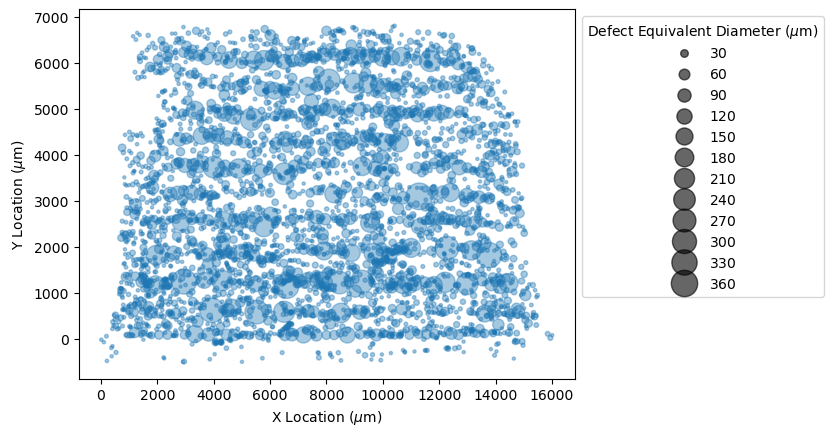

In [290]:
# Flip and translate data in y-direction to represent it in the correct orientation relative to original figure.
df1['CentroidY_new'] = -df1['CentroidY (um)'] + 7700

fig, ax = plt.subplots()

scatter = ax.scatter(df1['CentroidX (um)'], df1['CentroidY_new'], s=df1['Equivalent Diameter (um)'], alpha=0.4)
handles, labels = scatter.legend_elements(prop='sizes', alpha=0.6)
legend2 = ax.legend(handles, labels, title=r'Defect Equivalent Diameter ($\mu$m)', bbox_to_anchor=(1,1))
plt.xlabel(r'X Location ($\mu$m)')
plt.ylabel(r'Y Location ($\mu$m)')

plt.show()

### 2.2 Defect Size Histogram
To see the size distribution of the defects, a histogram of the defect sizes is shown.

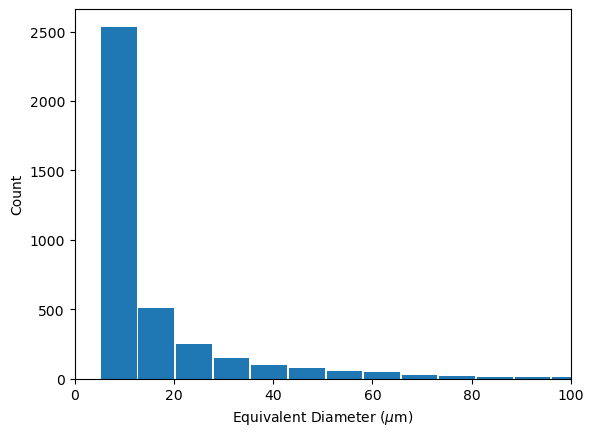

In [291]:
plt.hist(df1['Equivalent Diameter (um)'], bins=48,rwidth=0.95)
plt.xlim(0,100)
plt.xlabel(r'Equivalent Diameter ($\mu$m)')
plt.ylabel('Count')

plt.show()

### 2.3 Equivalent Diameter vs. Roundness
One way to distinguish between lack of fusion defects (defects between layers due to insufficient energy that lack remelting) and spherical porosity (from gas entrapment or keyhole) can be seen by using the roundness (a measure of the perimeter to the area where 1 is a perfect circle. 0.9 is used as a threshold above which the defect is labeled as spherical porosity.

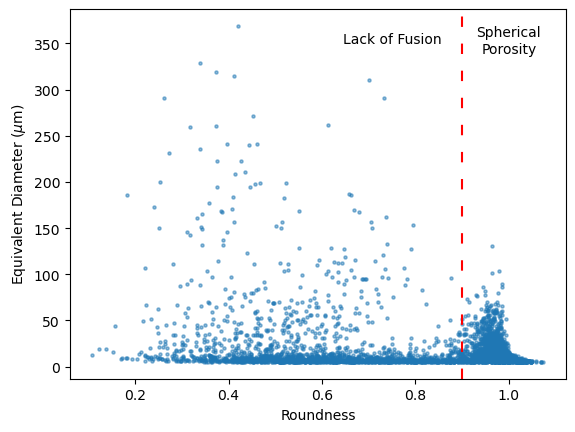

In [292]:
fig, ax = plt.subplots()

scatter = ax.scatter(df1['Roundness'],df1['Equivalent Diameter (um)'],alpha=0.5,s=5)
plt.axvline(x=0.9, color='r', linestyle=(0, (5, 8)))
plt.xlabel('Roundness')
plt.ylabel(r'Equivalent Diameter ($\mu$m)') 
ax.text(0.75,350, 'Lack of Fusion',horizontalalignment='center')
ax.text(1.0,340, 'Spherical\nPorosity',horizontalalignment='center')

plt.show()